In [57]:
from numpy import array, transpose
import numpy as np
from numpy.linalg import inv, qr, pinv
from matplotlib import pyplot
import math
from sklearn.metrics import r2_score

In [148]:
def read_list_int(str):
    return list(map(int, str.split(' ')))
with open("7.txt") as f:
    content = f.readlines()
n = int(content[0])
print (n)
m_train = int(content[1])
i = 0
data_train = []
data_test = []
Y = []
while i < m_train:
    data_train.append(read_list_int(content[i + 2]))
    i += 1
m_test = int(content[2 + m_train])
i = 3 + m_train
while i < len(content):
    data_test.append(read_list_int(content[i]))
    i += 1
data_train = np.array(data_train)
data_test = np.array(data_test)

185


r2_score using pseudoinverse : 0.9999999999848447
r2_score using LinearRegression() model : 0.9999999998991274


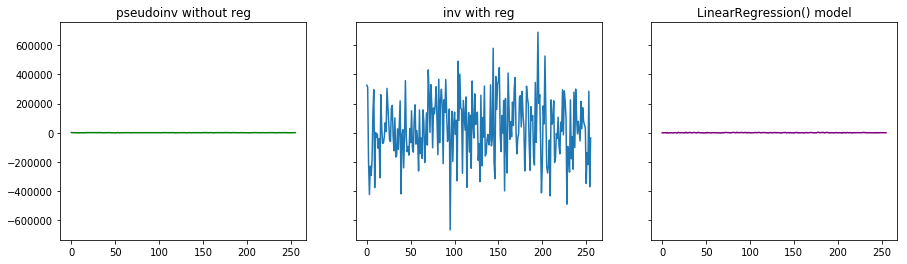

In [149]:
X_train, y_train = data_train[:,:-1], data_train[:, -1]
b_pinv = pinv(X_train).dot(y_train)

l = 1e6
q1, q2 = X_train.shape
ed = np.eye(q2)
b_reg = inv(((X_train.T).dot(X_train)) + l*ed).dot(X_train.T).dot(y_train)
#b_reg = np.dot(np.dot(inv(np.dot(X_train.transpose(), X_train)), (X_train.transpose())), (y_train))

X_test, y_test = data_test[:,:-1], data_test[:,-1]
y_predicted = X_test.dot(b_reg)
y_predicted_pinv = X_test.dot(b_pinv)

w1 = r2_score(y_test, y_predicted)

w2 = r2_score(y_test, y_predicted_pinv)
print ("r2_score using pseudoinverse : {}".format(w2))

y_res0 = (y_predicted_pinv - y_test)

y_res1 = (y_predicted - y_test)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
e = reg.score(X_test, y_test)
print ("r2_score using LinearRegression() model : {}".format(e))
y_reg = reg.predict(X_test)
y_res2 = (y_reg - y_test)

f, (ax1, ax2, ax3) = pyplot.subplots(1, 3, sharey=True)
f.set_figheight(4)
f.set_figwidth(15)
ax1.set_title('pseudoinv without reg')
ax2.set_title('inv with reg')
ax3.set_title('LinearRegression() model')
ax1.plot(range(0, y_test.size), y_res0, color='green')
ax2.plot(range(0, y_test.size), y_res1)
ax3.plot(range(0, y_test.size), y_res2, color='purple')

pyplot.show()

In [150]:
def gradient_descent(X, y, iterations):
    n, m = X.shape
    w = np.zeros(m)
    a = 1e-19
    for i in range(iterations):
        y_pred = X.dot(w)
        grad = 2 * X.T.dot(y_pred - y)
        w -= a * grad
    return w

#Q = sum_j(<w, x_j> -y_j)^2
#dQ_i = 2 * x_i_j * (<w,x_j> - y_j)

In [151]:
def nrmse(X, y, w):    
    n, m = X.shape
    sum_errors = 0
    y_max = np.max(y)
    for i in range(n):
        expected_value = np.sum(X[i] * w)
        sum_errors += (y[i] - expected_value) ** 2
    return math.sqrt(sum_errors / n) / y_max

9.927578511505446e-07


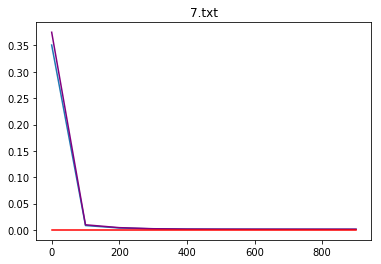

In [152]:
res = []
res1 = []
res_pinv = []
b_pinv = pinv(X_train).dot(y_train)
X_train, y_train = data_train[:,:-1], data_train[:,-1]
X_test, y_test = data_test[:,:-1], data_test[:,-1]
for i in range(0, 1000, 100):
    w = gradient_descent(X_train, y_train, i)
    res.append(nrmse(X_train, y_train, w))
    res1.append(nrmse(X_test, y_test, w))
    res_pinv.append(nrmse(X_test, y_test, b_pinv))
print (res_pinv[0])
pyplot.plot(range(0, 1000, 100), res)
pyplot.plot(range(0, 1000, 100), res1, color='purple')
pyplot.plot(range(0, 1000, 100), res_pinv, color='red')
pyplot.title("7.txt")
pyplot.show()

In [153]:
from IPython.display import Image

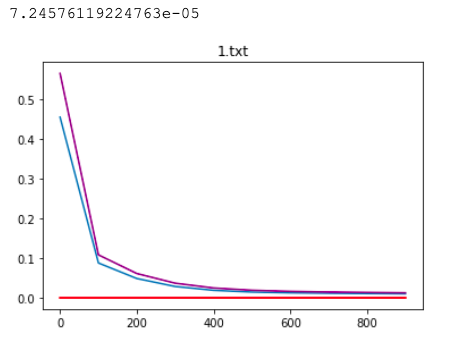

In [158]:
Image(filename='Desktop/1.png')

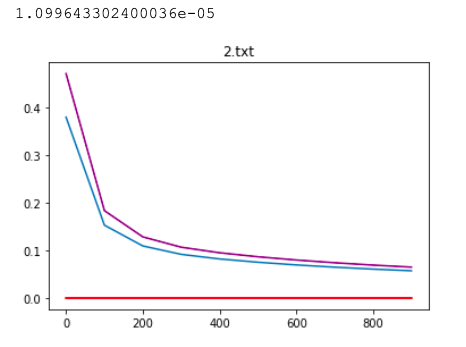

In [159]:
Image(filename='Desktop/2.png')

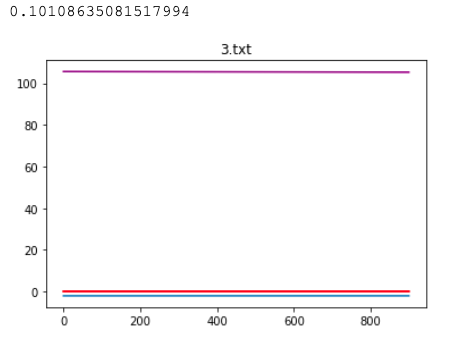

In [160]:
Image(filename='Desktop/3.png')

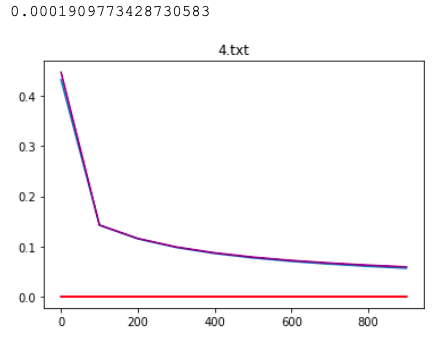

In [161]:
Image(filename='Desktop/4.png')

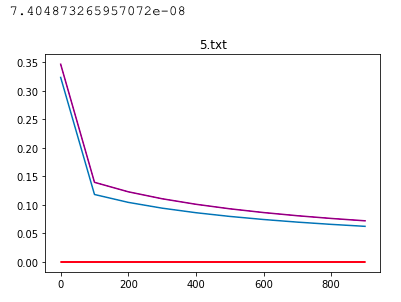

In [162]:
Image(filename='Desktop/5.png')

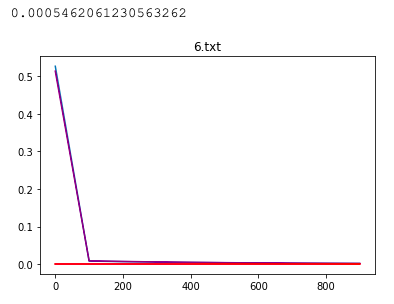

In [163]:
Image(filename='Desktop/6.png')

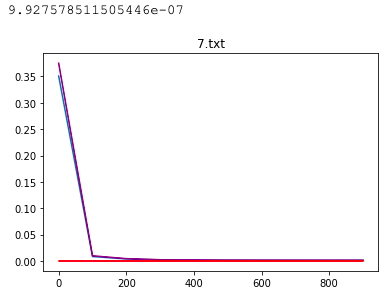

In [164]:
Image(filename='Desktop/7.png')